In [1]:
import sys
sys.path.insert(0, '/Users/Onur/repos/toolbox/')
from plot_helpers import *
import numpy as np
%matplotlib inline

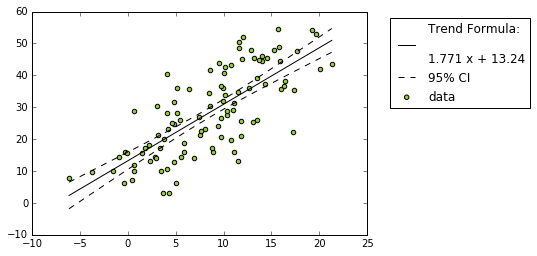

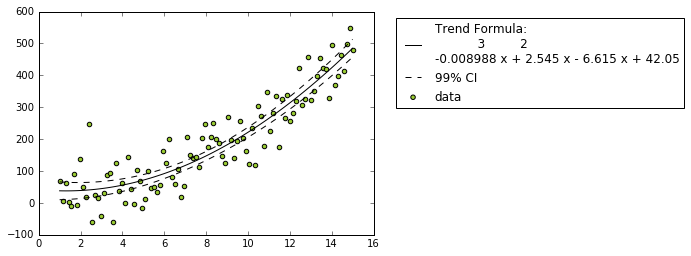

In [2]:
#make the dataset for order 1
x = np.linspace(1, 15, 100)
y = 3*x + 4
x = np.random.normal(x, scale=4)
y = np.random.normal(y, scale=4)
fig, ax = plt.subplots()
plt.scatter(x, y, c='yellowgreen', label='data')

xfit, trend_fn, conf_dy = trendline(x, y, confint=True, conf=.95, poly=1)
# plot trendline
ax.plot(xfit, trend_fn(xfit), color='k', label='Trend Formula: \n%s' %(trend_fn)) 

# Plot confidence intervals of fit
ax.plot(xfit, trend_fn(xfit)+conf_dy, color='k', linestyle='--', label='95% CI') 
ax.plot(xfit, trend_fn(xfit)-conf_dy, color='k', linestyle='--') 

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.), scatterpoints=1)
plt.show()

#make the dataset for order 2
x = np.linspace(1, 15, 100)
y = 2*x**2 + x + 4
y = np.random.normal(y, scale=50)
fig, ax = plt.subplots()
plt.scatter(x, y, c='yellowgreen', label='data')

xfit, trend_fn, conf_dy = trendline(x, y, confint=True, conf=.99, poly=3)
# plot trendline
ax.plot(xfit, trend_fn(xfit), color='k', label='Trend Formula: \n%s' %(trend_fn)) 

# Plot confidence intervals of fit
ax.plot(xfit, trend_fn(xfit)+conf_dy, color='k', linestyle='--', label='99% CI') 
ax.plot(xfit, trend_fn(xfit)-conf_dy, color='k', linestyle='--') 

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.), scatterpoints=1)
plt.show()

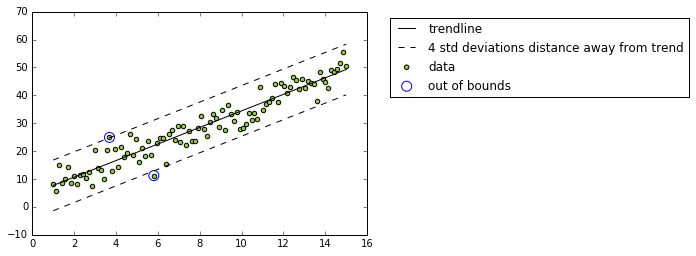

In [3]:
# initialize data
x = np.linspace(1, 15, 100)
y = 3*x + 4
y = np.random.normal(y, scale=4)

dy, trend_fn = stddev_from_trendline(x, y, sigma=4)

fig, ax = plt.subplots()
# data
ax.scatter(x, y, c='yellowgreen', label='data') 
# trendline
ax.plot(x, trend_fn(x), color='k', label='trendline') 
# std line upper bound
ax.plot(x, trend_fn(x)+dy, linestyle='--', color='k', label='4 std deviations distance away from trend') 
# std line lower bound 
ax.plot(x, trend_fn(x)-dy, linestyle='--', color='k') 

# find lines that are outside this range
idx_dwn = np.where(y < trend_fn(x)-dy)[0]
idx_up = np.where(y > trend_fn(x)+dy)[0]
idx = np.concatenate((idx_dwn, idx_up))
outside_x = x[idx]
outside_y = y[idx]
#plot them
ax.scatter(outside_x, outside_y, s=100, color='', edgecolors='blue', label='out of bounds')

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.), scatterpoints=1)
plt.show()